In [13]:
library(igraph)
install.packages('Matrix')
install.packages('pracma')
library('Matrix')
library('pracma')


The downloaded binary packages are in
	/var/folders/14/xxfy1jlj5yz5clkggqcg6mpr0000gn/T//Rtmp3npVkX/downloaded_packages

The downloaded binary packages are in
	/var/folders/14/xxfy1jlj5yz5clkggqcg6mpr0000gn/T//Rtmp3npVkX/downloaded_packages



Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [14]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [16]:
g2_2 <- barabasi.game(1000, directed=F, m=1)

In [92]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    re = seq_len(0)    
    v = start_node
    for(i in 1:num_steps){
        re = c(re, v)
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF) 
    }
    
    return(re)
}

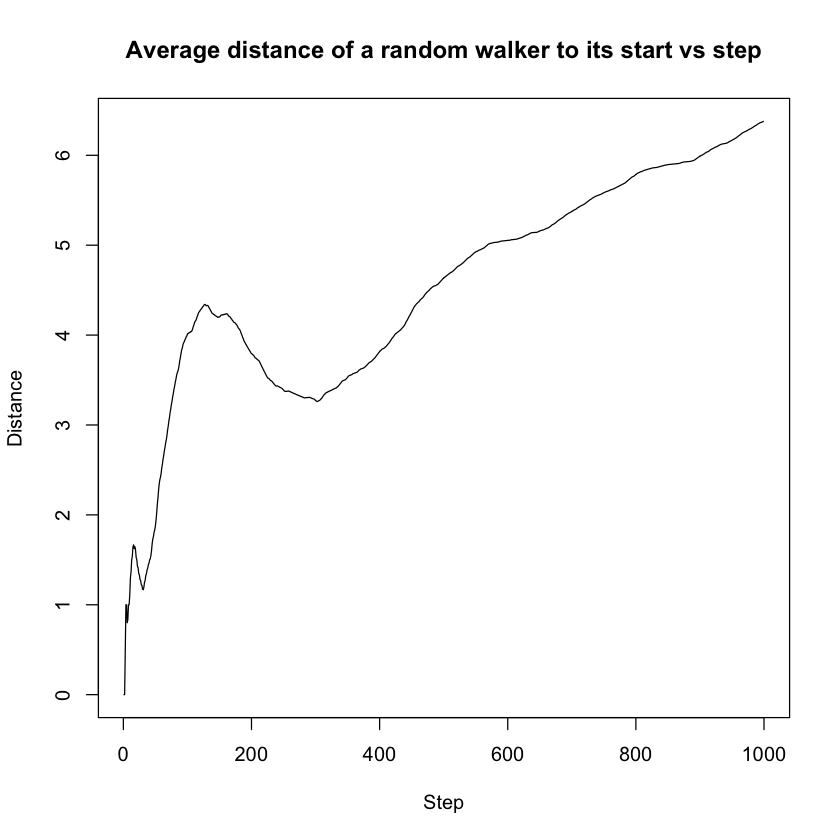

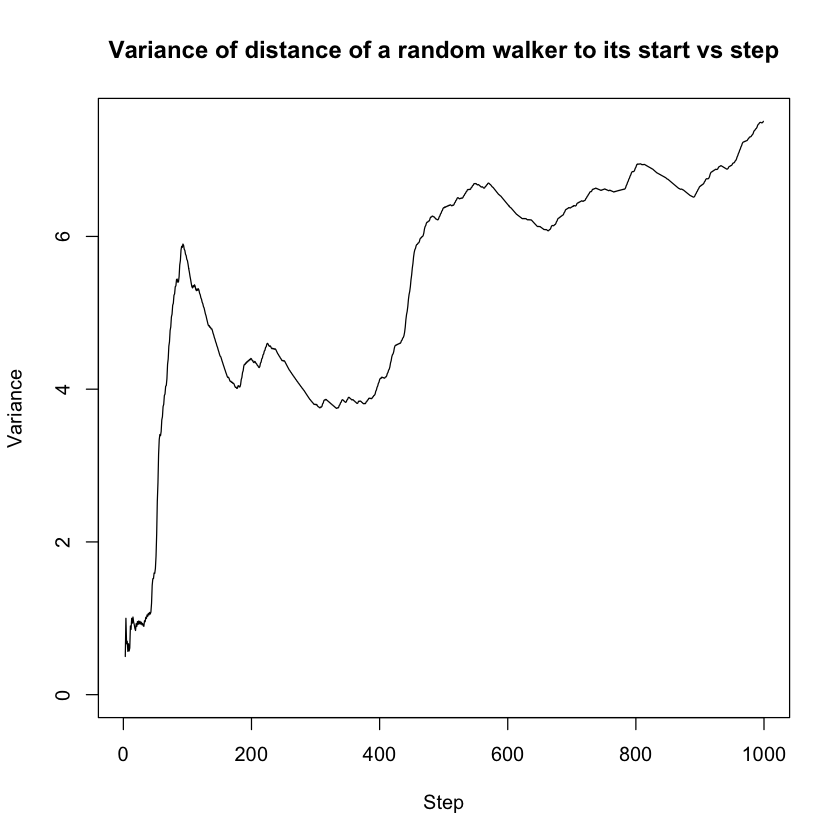

In [118]:
set.seed(1)
start_2 <- sample(1:1000, 1)
steps <- 1000
count_2 <- seq(2, 1000, 1)
dis_2 <- seq_len(0)
v <- random_walk(g2_2, steps, start_2)
for (i in count_2) {
    dis_2 <- c(dis_2, shortest.paths(g2_2, v[1],v[i]))
}
step_list <- seq(1, 999, 1)
ave_list <- seq_len(0)
ave_list <- c(ave_list, 0)
std_list <- seq_len(0)
std_list <- c(std_list, 0)

for (s in step_list) {
    ave_list <- c(ave_list, mean(dis_2[1:s+1]))
    std_list <- c(std_list, var(dis_2[1:s+1]))
}
plot(seq(1,1000,1), ave_list, main="Average distance of a random walker to its start vs step",xlab="Step",ylab="Distance", type="l")
plot(seq(1,1000,1), std_list, main="Variance of distance of a random walker to its start vs step",xlab="Step",ylab="Variance", type="l")

In [117]:
std_list[1]

[1] 0

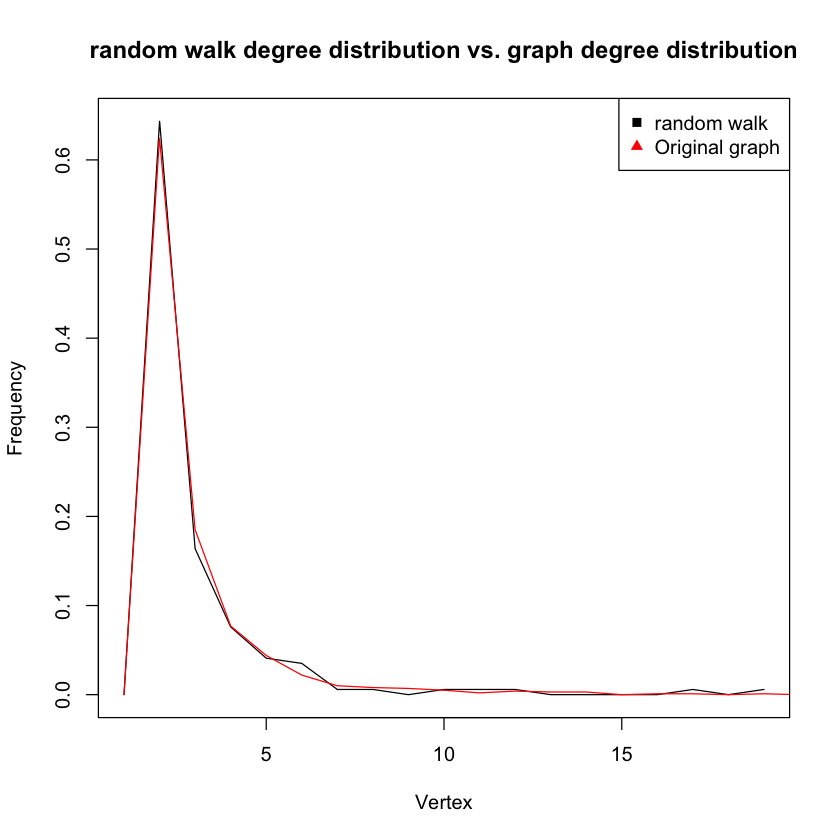

In [112]:
plot(degree.distribution(induced_subgraph(g2_2, v)), main="random walk degree distribution vs. graph degree distribution",xlab="Vertex",ylab="Frequency", type="l")
lines(degree.distribution(g2_2), col="red")
legend("topright", legend=c("random walk", "Original graph"), col=c("black", "red"), pch=c(15,17))